In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# **Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

# **Importing Data**

In [3]:
sample_data= pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')
train_data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test_data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

# **EDA**

In [4]:
train_data.shape

(20000, 22)

In [5]:
train_data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [6]:
train_data.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


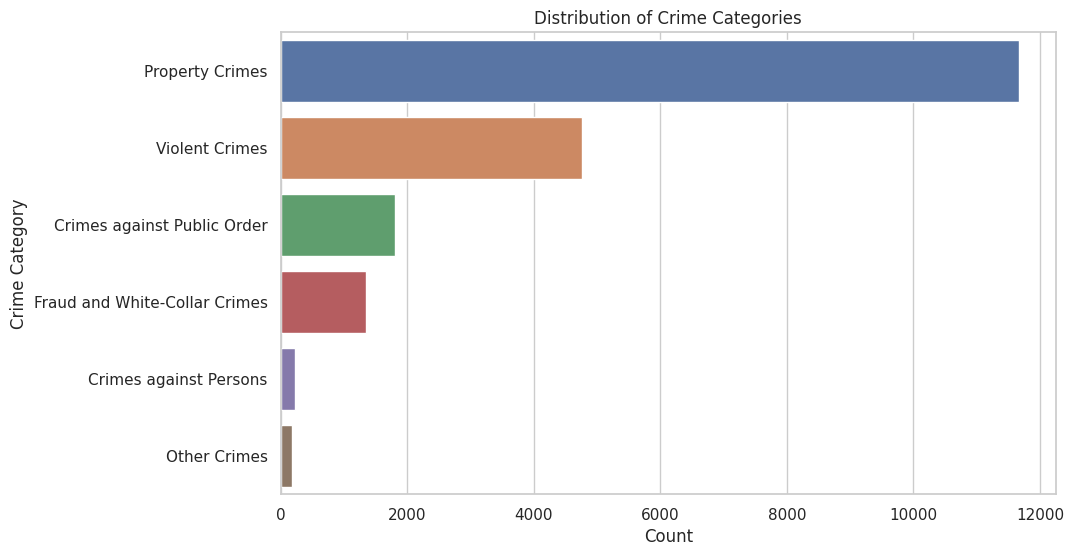

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


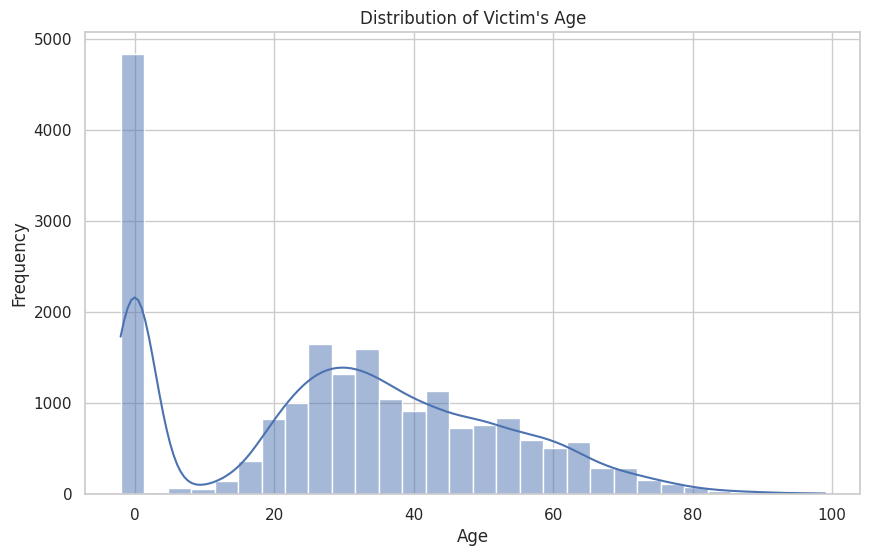

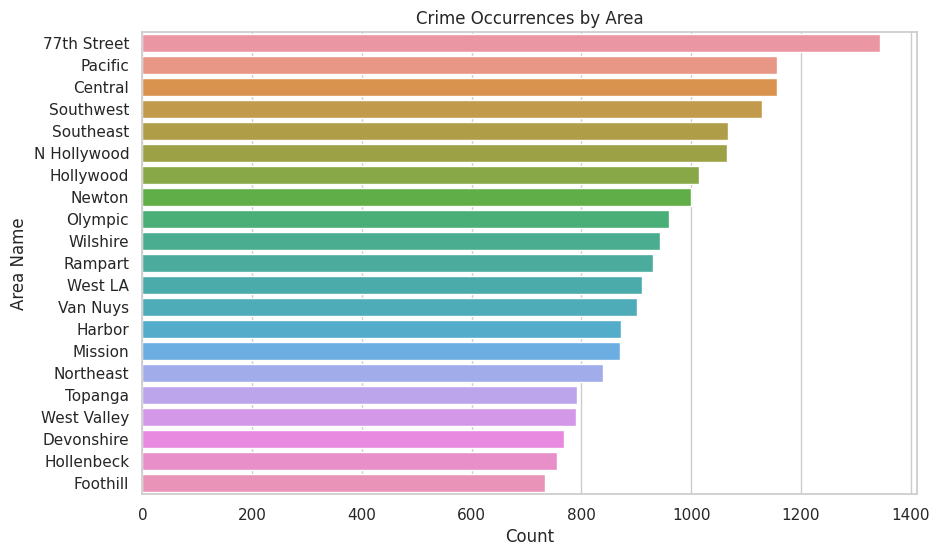

In [7]:
# Set up visualization styles
sns.set(style="whitegrid")

# 1. Distribution of Crime Categories
plt.figure(figsize=(10, 6))
sns.countplot(y="Crime_Category", data=train_data, order=train_data['Crime_Category'].value_counts().index)
plt.title("Distribution of Crime Categories")
plt.xlabel("Count")
plt.ylabel("Crime Category")
plt.show()

# 2. Distribution of Victim's Age
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Victim_Age'], bins=30, kde=True)
plt.title("Distribution of Victim's Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 3. Crime occurrences by Area
plt.figure(figsize=(10, 6))
sns.countplot(y="Area_Name", data=train_data, order=train_data['Area_Name'].value_counts().index)
plt.title("Crime Occurrences by Area")
plt.xlabel("Count")
plt.ylabel("Area Name")
plt.show()


# **-->Identify the feature types**

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

# **Data preprocessing**

In [9]:
#Here the target column is "Crime_Category"
x=train_data.iloc[:,:-1]
y=train_data.iloc[:, -1]

In [10]:
#finding the unique value in the column
train_data["Crime_Category"].unique()

array(['Property Crimes', 'Violent Crimes', 'Other Crimes',
       'Crimes against Public Order', 'Fraud and White-Collar Crimes',
       'Crimes against Persons'], dtype=object)

In [11]:
train_data["Crime_Category"].value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

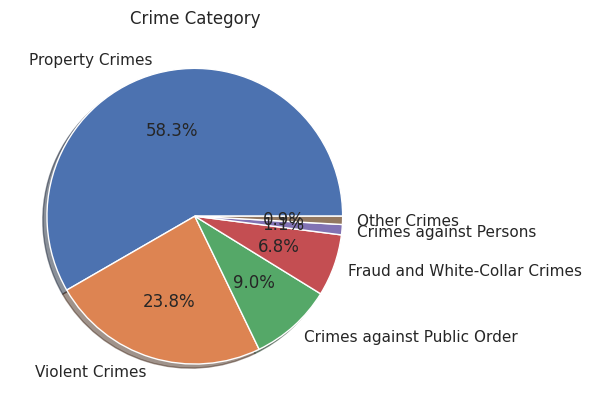

In [12]:
values = pd.Series(train_data['Crime_Category'])
v_counts = values.value_counts()
total = len(values)
fig = plt.figure()
plt.title("Crime Category")
plt.pie(v_counts, labels=v_counts.index, autopct='%1.1f%%', shadow=True);

In [13]:
x.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,0385,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,0329 1300,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont


In [14]:
y

0                    Property Crimes
1                    Property Crimes
2                    Property Crimes
3                    Property Crimes
4                    Property Crimes
                    ...             
19995                 Violent Crimes
19996                Property Crimes
19997                Property Crimes
19998    Crimes against Public Order
19999                Property Crimes
Name: Crime_Category, Length: 20000, dtype: object

In [15]:
#before encoding
y.value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

# **-->encoding categorical features**

In [16]:
#puttng the crime category into list according to their value count
y_labels=y.value_counts().index.to_list()
y_labels

['Property Crimes',
 'Violent Crimes',
 'Crimes against Public Order',
 'Fraud and White-Collar Crimes',
 'Crimes against Persons',
 'Other Crimes']

In [17]:
#converting each label in y to its corresponding index in the y_labels list.
y = y.map(lambda x: y_labels.index(x))

In [18]:
#after encoding
y.value_counts()

Crime_Category
0    11666
1     4767
2     1808
3     1355
4      225
5      179
Name: count, dtype: int64

# **-->spliting the train test dataset**

In [19]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=42 )
x_train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
17218,VANOWEN ST,TUJUNGA AV,34.1940,-118.3790,07/11/2020 12:00:00 AM,07/09/2020 12:00:00 AM,1500.0,15.0,N Hollywood,1516.0,...,NaN,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont
15188,12800 W RIVERSIDE DR,NaN,34.1576,-118.4122,08/19/2020 12:00:00 AM,08/14/2020 12:00:00 AM,1730.0,9.0,Van Nuys,969.0,...,0344 1300 0385,30.0,F,O,123.0,PARKING UNDERGROUND/BUILDING,NaN,NaN,IC,Invest Cont
11295,1500 N FRIES AV,NaN,33.7932,-118.2659,05/23/2020 12:00:00 AM,05/22/2020 12:00:00 AM,1700.0,5.0,Harbor,515.0,...,0329 0344 0377 1300 1601,40.0,F,H,101.0,STREET,NaN,NaN,IC,Invest Cont
19772,1200 W 80TH ST,NaN,33.9665,-118.2993,10/19/2020 12:00:00 AM,10/19/2020 12:00:00 AM,930.0,12.0,77th Street,1265.0,...,0908 0421 0329 0319 1309,56.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont
13072,1400 W 52ND ST,NaN,33.9974,-118.2982,02/20/2020 12:00:00 AM,02/18/2020 12:00:00 AM,1214.0,12.0,77th Street,1205.0,...,2038 0913,43.0,F,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [20]:
#creating list of columns having numerical value
num_cols= x_train.select_dtypes(include="float64").columns.to_list()
num_cols

['Latitude',
 'Longitude',
 'Time_Occurred',
 'Area_ID',
 'Reporting_District_no',
 'Part 1-2',
 'Victim_Age',
 'Premise_Code',
 'Weapon_Used_Code']

In [21]:
#integrating the above list into the dataset
x_train= x_train[num_cols]
x_test= x_test[num_cols]
test_data=test_data[num_cols]

In [22]:
x_train.head(10)

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
17218,34.1940,-118.3790,1500.0,15.0,1516.0,1.0,0.0,101.0,NaN
15188,34.1576,-118.4122,1730.0,9.0,969.0,1.0,30.0,123.0,NaN
11295,33.7932,-118.2659,1700.0,5.0,515.0,1.0,40.0,101.0,NaN
19772,33.9665,-118.2993,930.0,12.0,1265.0,2.0,56.0,501.0,NaN
13072,33.9974,-118.2982,1214.0,12.0,1205.0,2.0,43.0,501.0,NaN
19921,33.9456,-118.2695,1200.0,18.0,1823.0,2.0,22.0,502.0,400.0
6649,34.0998,-118.3211,100.0,6.0,647.0,1.0,21.0,207.0,NaN
11581,34.0480,-118.2577,830.0,1.0,162.0,2.0,28.0,252.0,500.0
8076,34.0921,-118.2105,2040.0,11.0,1179.0,1.0,40.0,101.0,102.0
10911,34.2626,-118.4094,1908.0,16.0,1645.0,1.0,0.0,101.0,500.0


In [23]:
x_train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,5095.000000
mean,33.937695,-117.881610,1354.516286,10.839286,1129.960357,1.418357,30.016643,298.287500,366.249657
std,2.153754,7.471422,647.553203,6.013049,601.396842,0.493307,21.910596,212.795596,120.871863
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009100,-118.430800,930.000000,6.000000,636.000000,1.000000,10.000000,101.000000,312.000000
50%,34.058900,-118.323600,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.166500,-118.275500,1900.000000,16.000000,1621.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,966.000000,515.000000


# **Detecting missing data**

In [24]:
#checking the columns for null value
x_train.isnull().sum()

Latitude                    0
Longitude                   0
Time_Occurred               0
Area_ID                     0
Reporting_District_no       0
Part 1-2                    0
Victim_Age                  0
Premise_Code                0
Weapon_Used_Code         8905
dtype: int64

In [25]:
null_colm = [col for col in x_train.columns if x_train[col].isnull().any() ]
null_colm

['Weapon_Used_Code']

In [26]:
x_train["Weapon_Used_Code"].describe()

count    5095.000000
mean      366.249657
std       120.871863
min       101.000000
25%       312.000000
50%       400.000000
75%       400.000000
max       515.000000
Name: Weapon_Used_Code, dtype: float64

# **Imputation**

**Replaceing missing values with the mean**

In [27]:
imputer = SimpleImputer()
x_train= pd.DataFrame(imputer.fit_transform(x_train),columns=x_train.columns )
x_test= pd.DataFrame(imputer.transform(x_test),columns=x_test.columns )
test_data= pd.DataFrame(imputer.transform(test_data),columns=test_data.columns )

In [28]:
x_train.head()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
0,34.1940,-118.3790,1500.0,15.0,1516.0,1.0,0.0,101.0,366.249657
1,34.1576,-118.4122,1730.0,9.0,969.0,1.0,30.0,123.0,366.249657
2,33.7932,-118.2659,1700.0,5.0,515.0,1.0,40.0,101.0,366.249657
3,33.9665,-118.2993,930.0,12.0,1265.0,2.0,56.0,501.0,366.249657
4,33.9974,-118.2982,1214.0,12.0,1205.0,2.0,43.0,501.0,366.249657


In [29]:
test_data.head()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
0,34.0128,-118.3045,2000.0,3.0,376.0,2.0,28.0,501.0,400.000000
1,34.0726,-118.3029,1700.0,20.0,2014.0,1.0,26.0,502.0,366.249657
2,33.9348,-118.2695,900.0,18.0,1844.0,2.0,62.0,721.0,366.249657
3,34.0497,-118.3442,2200.0,7.0,765.0,1.0,0.0,108.0,366.249657
4,34.1611,-118.3704,130.0,15.0,1555.0,2.0,37.0,501.0,366.249657


# **Modeling**

In [30]:
 models={}

# --> LogisticRegression

In [31]:
# Defining the model
lr_model = LogisticRegression(max_iter=10000, random_state=42, C= 10, penalty= 'l1', solver= 'liblinear')
# # Defining the hyperparameter grid
# param_grid = {
#     'C': [ 0.1, 1, 10],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga']
# }
# # setup GridSearchCV
# grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# # fit GridSearchCV
# grid_search.fit(x_train, y_train)

# # Output the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# print("Best Parameters:", best_params)
# print("Best Accuracy:", best_score)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
models["lr_model"]=lr_model

In [32]:
# Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
# Best Accuracy: 0.6361428571428572

# --> DecisionTreeClassifier

In [33]:
# # Defining the model
tree_model= DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4, min_samples_split=5)
# # Defining the hyperparameter grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [6, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2']
# }
# # setup GridSearchCV
# grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
# # fit GridSearchCV 
# grid_search.fit(x_train, y_train)

# # Output the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_
# print("Best Parameters:", best_params)
# print("Best Accuracy:", best_score)

tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)
models["tree_model"]=tree_model

In [34]:
# Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
# Best Accuracy: 0.8272857142857143


# --> RandomForestClassifer

In [35]:
# # Defining the model
rf_model= RandomForestClassifier(bootstrap=True, max_depth= 10, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 256,random_state=42)
# # Defining the hyperparameter distribution
# param_dist = {
#     'n_estimators': randint(100, 500),
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': randint(2, 11),
#     'min_samples_leaf': randint(1, 5),
#     'bootstrap': [True, False]
# }
# # setup RandomizedSearchCV
# random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)
# # fit RandomizedSearchCV
# random_search.fit(x_train, y_train)

# # Output the best parameters and best score
# best_params= random_search.best_params_
# best_score = random_search.best_score_
# print("Best Parameters:", best_params)
# print("Best Accuracy:", best_score)

rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
models["rf_model"]= rf_model

In [36]:
# Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 256}
# Best Accuracy: 0.8379285714285715

# **Model Evaluation**

In [37]:
def accuracy(y_true, y_preds):
   return (y_true==y_preds).sum()/len(y_true)

In [38]:
acc={m: accuracy(y_test, models[m].predict(x_test))for m in models}
acc

{'lr_model': 0.6315, 'tree_model': 0.8353333333333334, 'rf_model': 0.845}

In [39]:
best_model= max(acc, key=lambda x: acc[x])
best_model

'rf_model'

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      3461
           1       0.40      0.52      0.45      1462
           2       0.00      0.00      0.00       543
           3       0.24      0.05      0.09       422
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        55

    accuracy                           0.63      6000
   macro avg       0.23      0.24      0.22      6000
weighted avg       0.55      0.63      0.58      6000

Logistic Regression Confusion Matrix:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


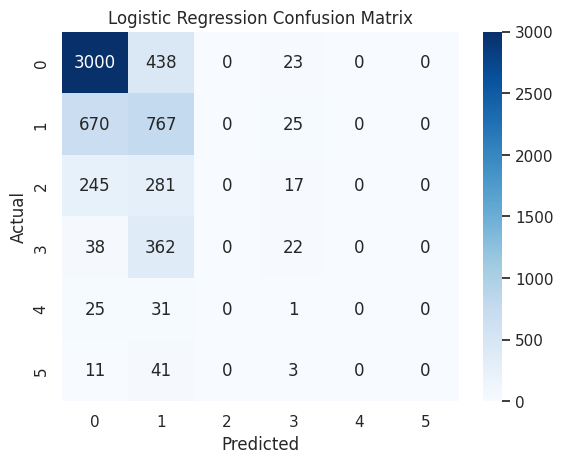

 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3461
           1       0.81      0.89      0.85      1462
           2       0.72      0.37      0.49       543
           3       0.56      0.77      0.65       422
           4       0.58      0.65      0.61        57
           5       0.00      0.00      0.00        55

    accuracy                           0.84      6000
   macro avg       0.60      0.60      0.58      6000
weighted avg       0.83      0.84      0.83      6000

 Decision Tree Confusion Matrix:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


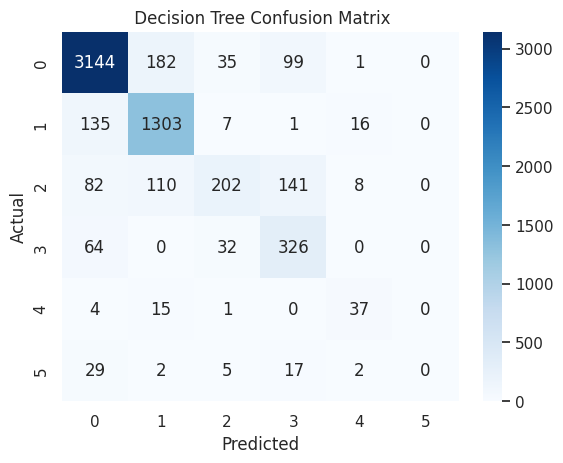

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3461
           1       0.82      0.89      0.85      1462
           2       0.77      0.38      0.51       543
           3       0.60      0.78      0.67       422
           4       0.68      0.49      0.57        57
           5       0.50      0.02      0.04        55

    accuracy                           0.84      6000
   macro avg       0.71      0.58      0.59      6000
weighted avg       0.84      0.84      0.83      6000

Random Forest Confusion Matrix:


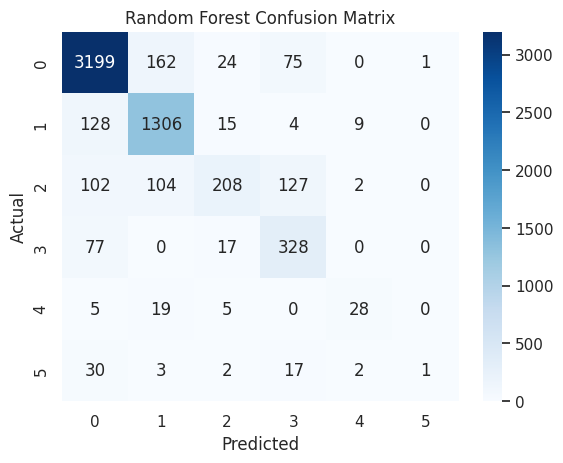

In [40]:
# Classification Report and Confusion Matrix for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Logistic Regression Confusion Matrix:")
lr_confusion = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(lr_confusion, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report and Confusion Matrix for Decision Tree
print(" Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

print(" Decision Tree Confusion Matrix:")
tree_confusion = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(tree_confusion, annot=True, fmt='d', cmap='Blues')
plt.title(" Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report and Confusion Matrix for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
rf_confusion = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Prediction**

In [41]:
test_pred= models[best_model].predict(test_data)
test_pred

array([1, 0, 3, ..., 1, 1, 0])

# **Output**

In [42]:
output= pd.DataFrame(
    {
        "ID": test_data.index+1,
        "Crime_Category": test_pred
    }
)
output["Crime_Category"]= output["Crime_Category"].map(lambda x: y_labels[x])

In [43]:
output.head()

,ID,Crime_Category
0,1,Violent Crimes
1,2,Property Crimes
2,3,Fraud and White-Collar Crimes
3,4,Property Crimes
4,5,Fraud and White-Collar Crimes


# **Submission**

In [44]:
output.to_csv("./submission.csv", index=False)